In [4]:
# PART 1

# importing packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# importing the dataset (Nils)
educ_smoke_merged = pd.read_csv(r"C:\Users\nilsr\Desktop\Uni\Masters\z.Python\Python-Introduction-Smoking-Prevalence\data\clean\educ_smoke_merged.csv", index_col=0)

In [ ]:
# PART 2: mutivariate regression

# preparing data
educ_smoke_merged.head()
educ_smoke_merged.isnull().sum()

country         0
sex             0
year            0
educ_esl_pct    0
smoke_pct       0
dtype: int64

In [ ]:
# subset sex variable
educ_smoke_merged['sex'] = educ_smoke_merged['sex'].map({'Females': 0,
                                                        'Males': 1})
educ_smoke_merged['sex'] = pd.to_numeric(educ_smoke_merged['sex'],errors='coerce')
educ_smoke_merged['educ_esl_pct'] = pd.to_numeric(educ_smoke_merged['educ_esl_pct'],errors='coerce')

educ_smoke_merged.head()

,country,sex,year,educ_esl_pct,smoke_pct
0,Austria,0,2023,7.9,25.0
1,Austria,1,2023,9.3,39.0
2,Belgium,0,2023,4.4,15.0
3,Belgium,1,2023,7.9,27.0
6,Bulgaria,0,2023,9.2,27.0


In [ ]:
# Filter out the Europe aggregate observations
educ_smoke_merged = educ_smoke_merged[educ_smoke_merged["country"] != "European Union - 27 countries (from 2020)"]

In [ ]:
# set the variables
X_multiple = educ_smoke_merged[['sex', 'educ_esl_pct']]  # independent variable(s)
y = educ_smoke_merged['smoke_pct']   # dependent variable

In [ ]:
# Add constant for intercept
X_multiple = sm.add_constant(X_multiple)

# Fit OLS model
model = sm.OLS(y, X_multiple).fit(
    cov_type="cluster", # Cluster SEs on the country level
    cov_kwds={"groups": educ_smoke_merged["country"]})

# Print full summary
print(model.summary2())

# Save as text
table = model.summary2()

with open("C:/Users/nilsr/Desktop/Uni/Masters/z.Python/Python-Introduction-Smoking-Prevalence/output/regression_results_Q2.txt", "w") as f:
    f.write(table.as_text())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.210   
Dependent Variable: smoke_pct        AIC:                381.5824
Date:               2025-12-20 01:03 BIC:                387.4933
No. Observations:   53               Log-Likelihood:     -187.79 
Df Model:           2                F-statistic:        20.06   
Df Residuals:       50               Prob (F-statistic): 5.37e-06
R-squared:          0.240            Scale:              74.207  
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         20.6162    3.5659   5.7814  0.0000  13.6271  27.6054
sex            9.5498    1.9358   4.9332  0.0000   5.7556  13.3440
educ_esl_pct  -0.0607    0.4527  -0.1341  0.8933  -0.9479   0.8265
-----------------------------------------------------------------
Omnibus:             

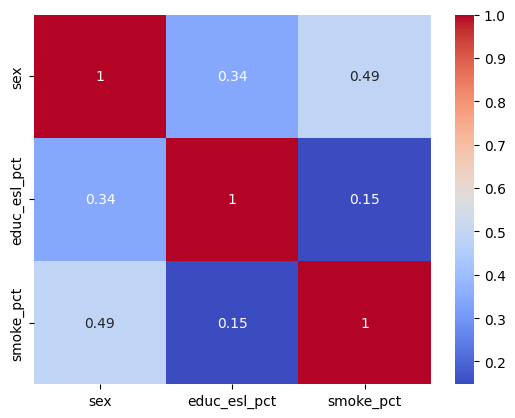

In [ ]:
#PART 3: the heat map

# preparing the dataset
educ_smoke_merged = educ_smoke_merged[educ_smoke_merged["year"]==2023]
sns.heatmap(
    educ_smoke_merged[['sex', 'educ_esl_pct', 'smoke_pct']]
    .corr(), # correlation matrix
    annot=True, # display correlation values
    cmap='coolwarm' # color scale blue to red
    )

plt.savefig("C:/Users/nilsr/Desktop/Uni/Masters/z.Python/Python-Introduction-Smoking-Prevalence/output/q2_heatmap.png", bbox_inches="tight")